<b><h1 style='text-align: center'> Linear Regression </h1></b>

<h2>1. Thư viện cần thiết</h2>

In [7]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

<h2>2. Bài toán </h2>
Từ dữ liệu ban đầu của tập train (cân nặng, chiều cao), đưa ra dự đoán về cân nặng khi cho biết chiều cao

<h3>2.1 Nhập dữ liệu </h3>

In [ ]:
# Nhập dữ liệu
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T     #.T thực hiện chuyển vị
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

# Plot data
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height - cm')
plt.ylabel('Weight - kg')
plt.show()

<b>Nhận xét</b>
<br> - Các dữ liệu được sắp xếp theo một đường thằng 
<br> -> Mô hình Linear Regression cho kết quả tốt
<br> - Từ đó, có đước: (cân nặng) = w_0 + w_1 * (chiều cao)

<h3>2.2 Tìm nghiệm </h3>
- Thực hiện tìm nghiệm theo (5) với <b>giả nghịch đảo một ma trận</b> <br>
- Trong python, <b>numpy.linalg.pinv(A)</b> được sử dụng để tính giả nghịch đảo

w =  [[-33.73541021]
 [  0.55920496]]


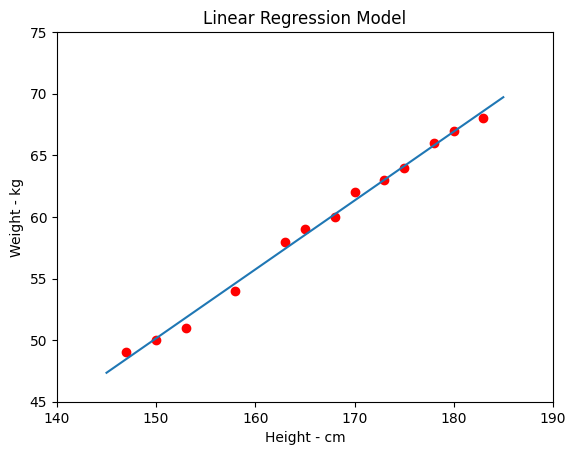

In [29]:
# a. Xây dụng X-bar (Tập hợp các x-bar (x gạch đầu))
one = np.ones((X.shape[0], 1))     # tạo một vector cột có X.shape[0] giá trị là 1 (X.shape[0] là số hàng)
Xbar = np.concatenate((one, X), axis = 1)

# b. Tính toán weights of the fitting line (w_i)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
#   áp dụng công thức với giả nghịch đảo ma trận của A, ta thu được w
w = np.dot(np.linalg.pinv(A), b)

# c. chuẩn bị fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2 )
y0 = w_0 + w_1*x0
print('w = ',w)

# print(x0)
plt.plot(X.T, y.T, 'ro')        # the data
plt.plot(x0, y0)                # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel("Height - cm")
plt.ylabel("Weight - kg")
plt.title("Linear Regression Model")
plt.show()

<b>Nhận xét</b>
- Các điểm data nằm khá sát với mô hình dự đoán the fitting line -> mô hình Linear Regression hoạt động tốt với tập dữ liệu training

<h3>2.3 Thử nghiệm </h3> <br>
- Tiến hành thử nghiệm với dữ liệu với người có chiều cao 155cm và 160cm

In [30]:
y1 = w_0 + w_1*155
y2 = w_0 + w_1*160  

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


<h2>3. Sử dụng thư viện Scikit-learn</h2> <br>
- Sử dụng thư viện scikit-learn của Python để tìm nghiệm với tập training trên

In [ ]:
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias 
                                                        # (không tính toán sai lệch -> mô hình đi qua gốc tọa độ)
# Huấn luyện mô hình
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )       # hệ số w tình bằng scikit-learn
print( 'Solution found by (5): ', w.T)                          # hệ số w tính bằng phương trình (5)